In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns

### load predicted behaviors

In [19]:
behaviors = load_behaviors('../processed_dataset/behaviors.pkl')

In [20]:
def get_transitions(predict, behavior_classes):
    class_int = [int(i) for i, behavior_name in enumerate(behavior_classes)]
    tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
    for (i, j) in zip(predict, predict[1:]):
        tm[int(i)][int(j)] += 1
    tm_df = pd.DataFrame(tm)
    tm_array = np.array(tm)
    tm_norm = tm_array / tm_array.sum(axis=1)
    return tm_array, tm_norm

### plot specific sex, group, condition -- Group (row) x Condition (column)

/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)


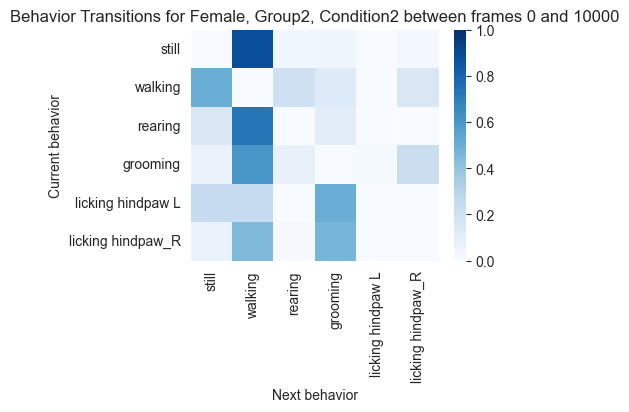

In [85]:
selected_sex = 'Female'   
selected_group = 'Group2'  # Specify the desired group
selected_condition = 'Condition2'  # Specify the desired condition
start_frame = 0  # Start frame (inclusive)
end_frame = 10000  # End frame (inclusive) Last frame = 112500

class_int = [int(i) for i, behavior_name in enumerate(behavior_names)]
all_count_tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
    behavior_sequence = behaviors[selected_sex][selected_group][selected_condition][f'file{f}'][start_frame:end_frame+1]  # +1 to include end_frame
    count_tm, prob_tm = get_transitions(behavior_sequence, behavior_names)
    np.fill_diagonal(count_tm, 0)
    all_count_tm += count_tm

all_prob_tm = all_count_tm/all_count_tm.sum(axis=1)[:, None]
transmat_df = pd.DataFrame(all_prob_tm, index=behavior_names, columns=behavior_names)
transmat_df.to_csv(f'../processed_dataset/behavior_transitions/behavior_transitions_{selected_sex}_{selected_group}_{selected_condition}_frames_{start_frame}_to_{end_frame}.csv')

plt.figure(figsize=(4, 3))
sns.heatmap(transmat_df, annot=False, cmap='Blues', cbar=True,
            vmin=0, vmax=1)

plt.title(f'Behavior Transitions for {selected_sex}, {selected_group}, {selected_condition} between frames {start_frame} and {end_frame}')
plt.xlabel('Next behavior')
plt.ylabel('Current behavior')

plt.gca().grid(False)  # Hide grid lines

plt.savefig('heatmap.svg', format='svg', dpi=600, bbox_inches='tight', transparent=True)

plt.show()

### plot male -- Group (row) x Condition (column)

In [ ]:
selected_sex = 'Male'
selected_group = 'Group1'  # Specify the desired group
selected_condition = 'Condition1'  # Specify the desired condition

class_int = [int(i) for i, behavior_name in enumerate(behavior_names)]
all_count_tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
    count_tm, prob_tm = get_transitions(behaviors[selected_sex][selected_group][selected_condition][f'file{f}'], behavior_names)
    np.fill_diagonal(count_tm, 0)
    all_count_tm += count_tm

all_prob_tm = all_count_tm/all_count_tm.sum(axis=1)[:, None]
transmat_df = pd.DataFrame(all_prob_tm, index=behavior_names, columns=behavior_names)
transmat_df.to_csv(f'../processed_dataset/behavior_transitions/behavior_transitions_{selected_sex}_{selected_group}_{selected_condition}.csv')

plt.figure(figsize=(5, 3))
sns.heatmap(transmat_df, annot=False, cmap='Blues', cbar=True,
            vmin=0, vmax=1)
plt.title(f'Behavior Transitions for {selected_sex}, {selected_group}, {selected_condition}')
plt.xlabel('Next behavior')
plt.ylabel('Current behavior')
plt.show()

/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_44257/2635141877.py:8: RuntimeWarning: invalid valu

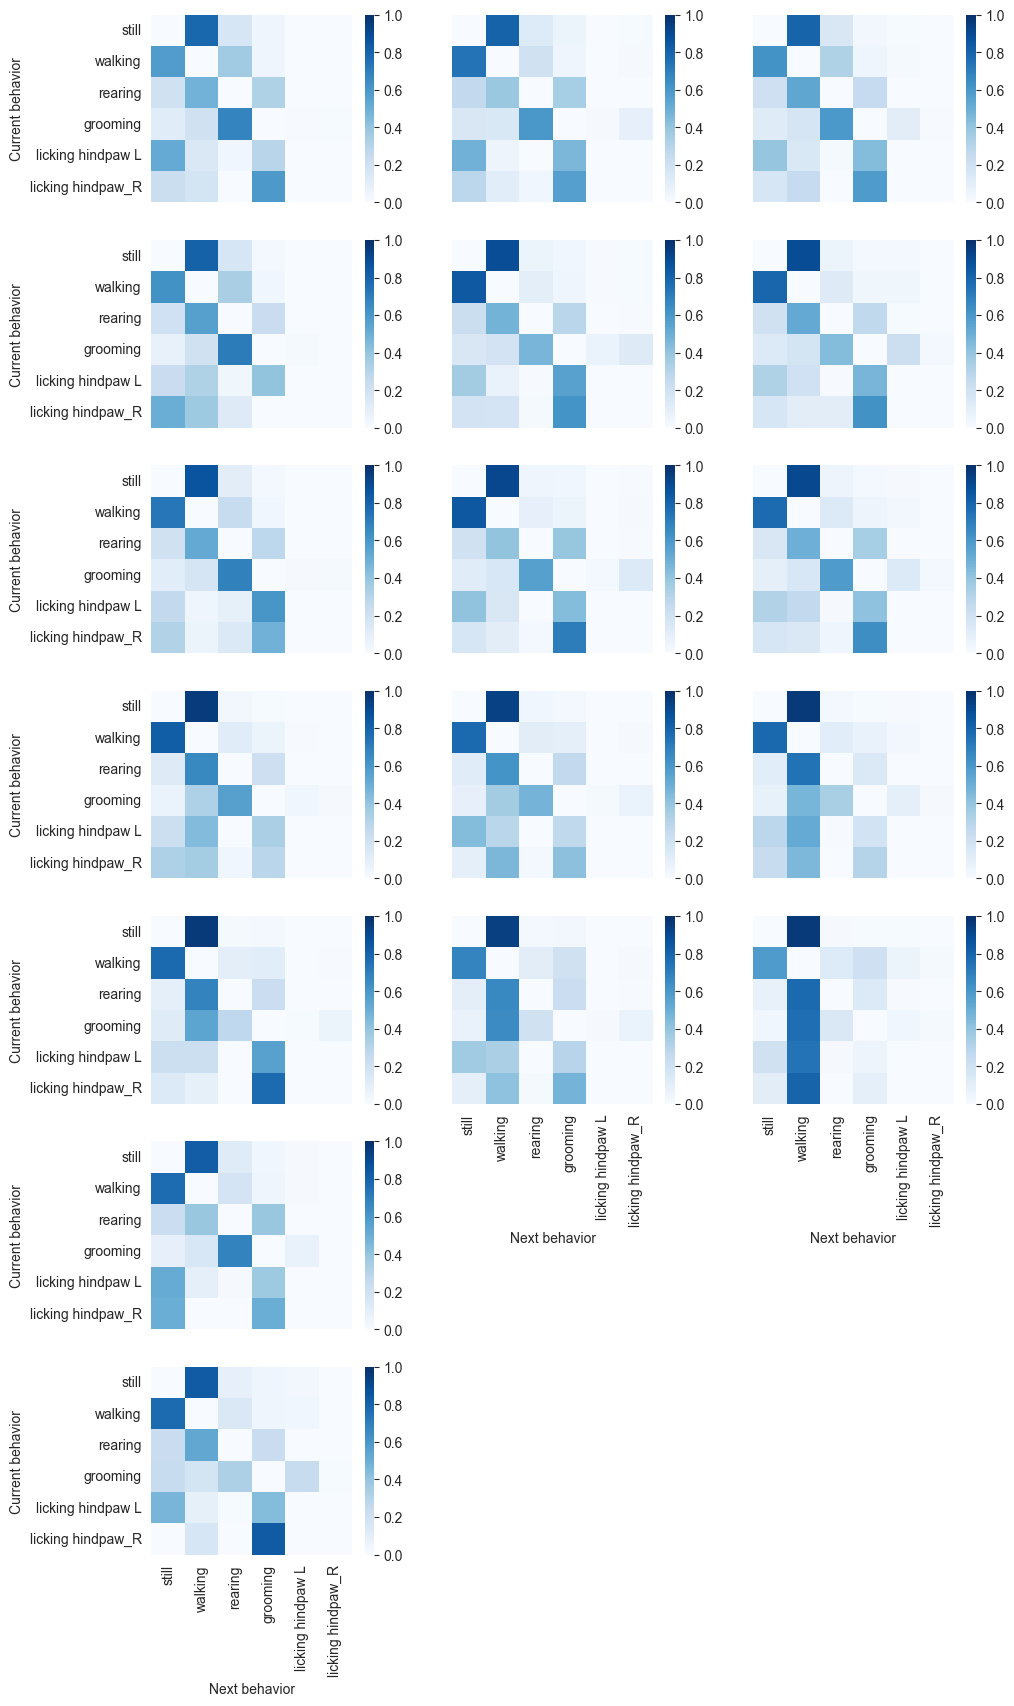

In [25]:
selected_sex = 'Male'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20), sharex=False, sharey=True)
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        class_int = [int(i) for i, behavior_name in enumerate(behavior_names)]
        all_count_tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
        for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
            count_tm, prob_tm = get_transitions(behaviors[selected_sex][selected_group][selected_condition][f'file{f}'], behavior_names)
            np.fill_diagonal(count_tm, 0)
            all_count_tm += count_tm
        
        all_prob_tm = all_count_tm/all_count_tm.sum(axis=1)[:, None]
        transmat_df = pd.DataFrame(all_prob_tm, index=behavior_names, columns=behavior_names)
        transmat_df.to_csv(f'../processed_dataset/behavior_transitions/behavior_transitions_{selected_sex}_{groups[row]}_{conditions[col]}.csv')
        
        sns.heatmap(transmat_df, annot=False, cmap='Blues', cbar=True,
                    vmin=0, vmax=1,
                    ax=ax[row, col])
        
        if col == 0:
            ax[row, col].set_ylabel('Current behavior')
        # ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == 4:
                ax[row, col].set_xlabel('Next behavior')
                ax[row, col].set_xticklabels(behavior_names)
            else:
                ax[row, col].set_xticklabels([])
                
        else:
            if row != rows - 1:
                ax[row, col].set_xticklabels([])
                
        if row == rows-1:
            ax[row, col].set_xlabel('Next behavior')


plt.show()

### file save, change the extension to change the file format

In [5]:
fig.savefig(f'../figures/behavior_transitions_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')

### Female -- Group x Condition

/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid value encountered in divide
  tm_norm = tm_array / tm_array.sum(axis=1)
/var/folders/gp/nsk60k_n2cz7kk79_pv33d8r0000gn/T/ipykernel_14076/2635141877.py:8: RuntimeWarning: invalid valu

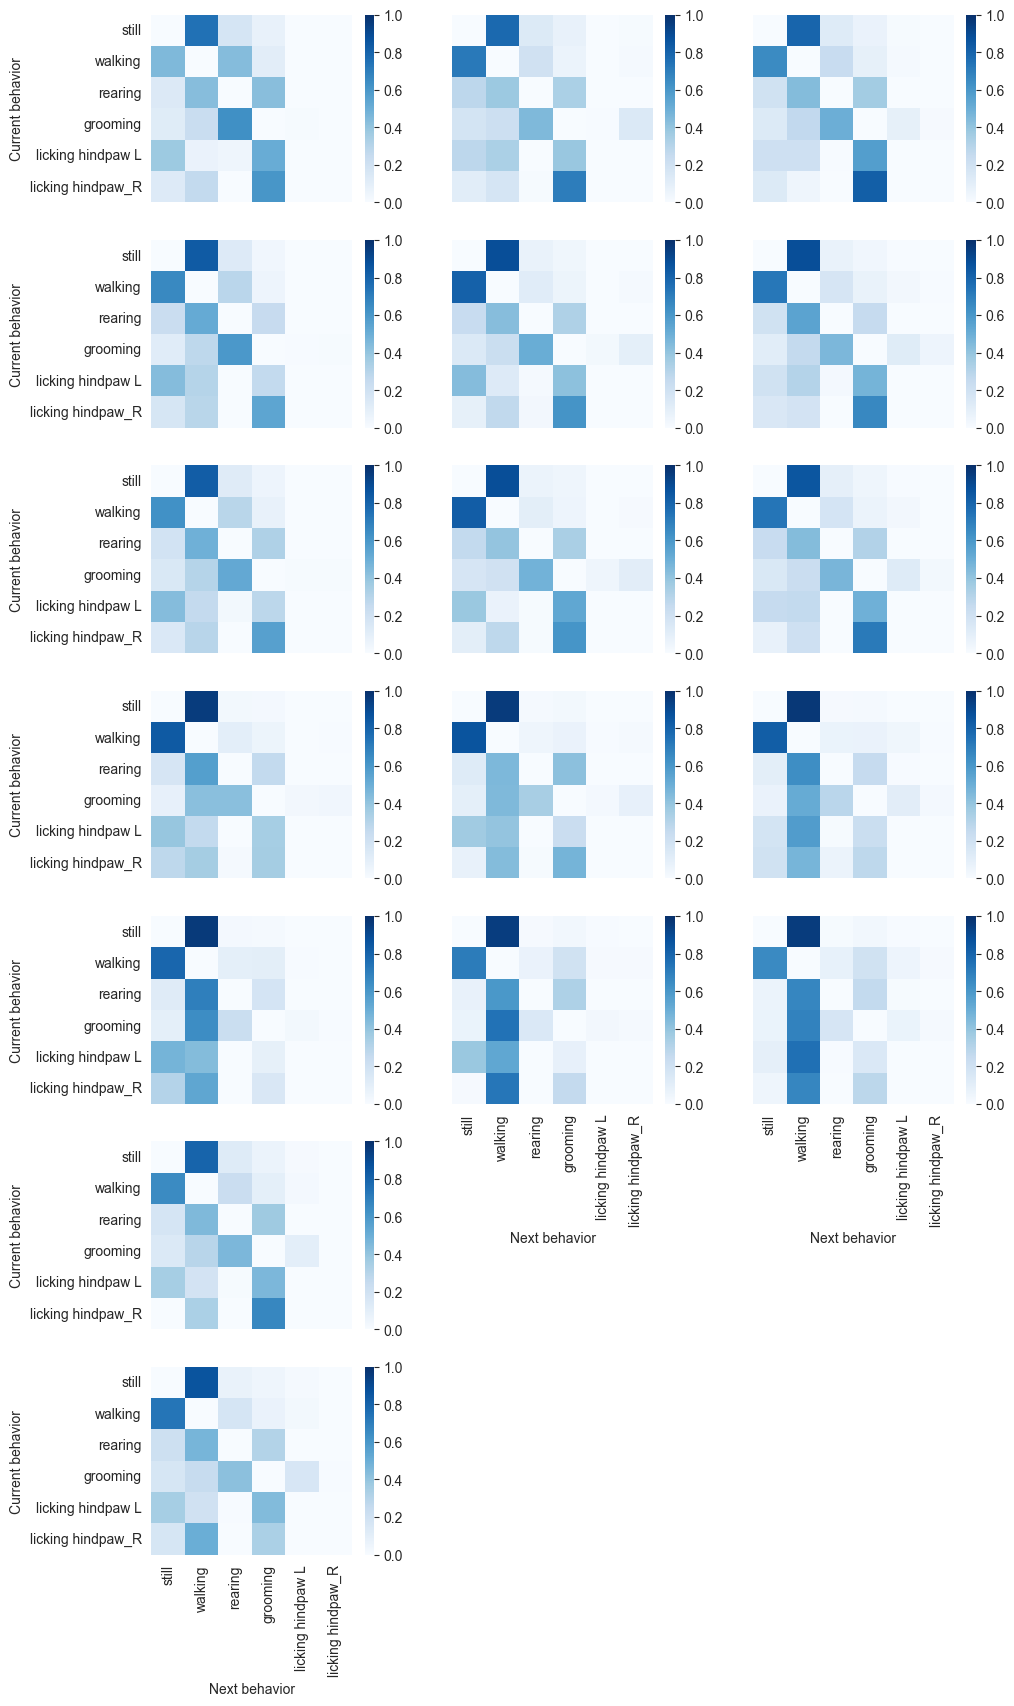

In [6]:
selected_sex = 'Female'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20), sharex=False, sharey=True)
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        class_int = [int(i) for i, behavior_name in enumerate(behavior_names)]
        all_count_tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
        for f in range(len(behaviors[selected_sex][selected_group][selected_condition])):
            count_tm, prob_tm = get_transitions(behaviors[selected_sex][selected_group][selected_condition][f'file{f}'], behavior_names)
            np.fill_diagonal(count_tm, 0)
            all_count_tm += count_tm
        
        all_prob_tm = all_count_tm/all_count_tm.sum(axis=1)[:, None]
        transmat_df = pd.DataFrame(all_prob_tm, index=behavior_names, columns=behavior_names)
        transmat_df.to_csv(f'../processed_dataset/behavior_transitions/behavior_transitions_{selected_sex}_{groups[row]}_{conditions[col]}.csv')
        
        sns.heatmap(transmat_df, annot=False, cmap='Blues', cbar=True,
                    vmin=0, vmax=1,
                    ax=ax[row, col])
        
        if col == 0:
            ax[row, col].set_ylabel('Current behavior')
        # ax[row, col].set_xlabel('')
        
        if col == 1 or col == 2:
            if row == 4:
                ax[row, col].set_xlabel('Next behavior')
                ax[row, col].set_xticklabels(behavior_names)
            else:
                ax[row, col].set_xticklabels([])
                
        else:
            if row != rows - 1:
                ax[row, col].set_xticklabels([])
                
        if row == rows-1:
            ax[row, col].set_xlabel('Next behavior')


plt.show()

### file save, change the extension to change the file format

In [7]:
fig.savefig(f'../figures/behavior_transitions_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')

Markov

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns

In [8]:
# Load behaviors
behaviors = load_behaviors('../processed_dataset/behaviors.pkl')

# Example usage:
# Assuming you have 'predict' and 'behavior_classes' variables available
# 'predict' is the predicted sequence of states
# 'behavior_classes' is the list of possible states

# Example:
# predict = [0, 1, 0, 2, 1, 2, 0, 1, 2]
# behavior_classes = ['A', 'B', 'C']





NameError: name 'predict' is not defined

In [10]:
def get_transitions(predict, behavior_classes):
    class_int = [int(i) for i, behavior_name in enumerate(behavior_classes)]
    tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
    for (i, j) in zip(predict, predict[1:]):
        tm[int(i)][int(j)] += 1
    tm_df = pd.DataFrame(tm)
    tm_array = np.array(tm)
    tm_norm = tm_array / tm_array.sum(axis=1)
    return tm_array, tm_norm

In [11]:
# Define the function for creating Markov transition matrix
def create_transition_matrix(predict, behavior_classes):
    class_int = [int(i) for i, behavior_name in enumerate(behavior_classes)]
    tm = [[0] * np.unique(class_int) for _ in np.unique(class_int)]
    for (i, j) in zip(predict, predict[1:]):
        tm[int(i)][int(j)] += 1
    tm_array = np.array(tm)
    tm_norm = tm_array / tm_array.sum(axis=1, keepdims=True)
    return tm_array, tm_norm

In [12]:
# Create Markov transition matrices
tm_array, tm_norm = create_transition_matrix(predict, behavior_classes)

# Print or visualize the matrices as needed
print("Markov Transition Matrix:")
print(tm_array)

print("\nNormalized Markov Transition Matrix:")
print(tm_norm)

NameError: name 'predict' is not defined